In [273]:
import pandas as pd

In [274]:
# Task 1

data_titanic = '/Users/reynasingh/ML-fundamentals-2025/titanic3.xls'
df = pd.read_excel(data_titanic)

print(df.head())
print(df.info())

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64
            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
me

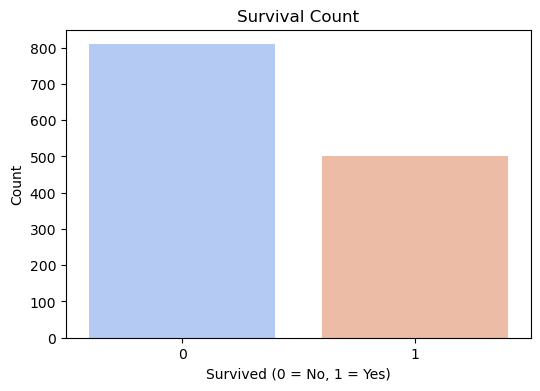

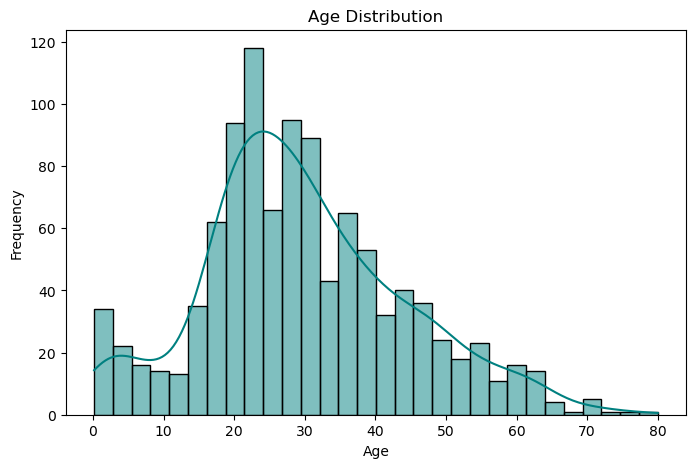

In [275]:
print(df.isnull().sum())
print(df.describe())

# Survival count plot
plt.figure(figsize=(6,4))
sns.countplot(x='survived', data=df, palette='coolwarm')
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['age'].dropna(), bins=30, kde=True, color='teal')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [276]:
# Task 2
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

age           263
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


In [277]:
df.drop(columns=['cabin', 'boat', 'body'], inplace=True)  
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True) 
df['fare'].fillna(df['fare'].median(), inplace=True)  
df['home.dest'].fillna(-1, inplace=True)

missing_values = df.isnull().sum()
print(missing_values)

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
embarked     0
home.dest    0
dtype: int64


In [278]:
# Task 3
from sklearn.preprocessing import OneHotEncoder

# One-hot encode 'sex' and 'embarked'
df = pd.get_dummies(df, columns=['sex', 'embarked'])
df.head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,home.dest,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,"St Louis, MO",1,0,0,0,1
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,"Montreal, PQ / Chesterville, ON",0,1,0,0,1
2,1,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,"Montreal, PQ / Chesterville, ON",1,0,0,0,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,"Montreal, PQ / Chesterville, ON",0,1,0,0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,"Montreal, PQ / Chesterville, ON",1,0,0,0,1


In [279]:
# Task 4
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numerical columns
numerical_cols = ['age', 'fare', 'sibsp', 'parch']

# Apply Standardization
st_scaler = StandardScaler()
df[num_cols] = st_scaler.fit_transform(df[num_cols])
df.head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,home.dest,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,1,"Allen, Miss. Elisabeth Walton",-0.039005,-0.479087,-0.445000,24160,3.442584,"St Louis, MO",1,0,0,0,1
1,1,1,"Allison, Master. Hudson Trevor",-2.215952,0.481288,1.866526,113781,2.286639,"Montreal, PQ / Chesterville, ON",0,1,0,0,1
2,1,0,"Allison, Miss. Helen Loraine",-2.131977,0.481288,1.866526,113781,2.286639,"Montreal, PQ / Chesterville, ON",1,0,0,0,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0.038512,0.481288,1.866526,113781,2.286639,"Montreal, PQ / Chesterville, ON",0,1,0,0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",-0.349075,0.481288,1.866526,113781,2.286639,"Montreal, PQ / Chesterville, ON",1,0,0,0,1


In [280]:
# Apply Normalisation

mm_scaler = MinMaxScaler()
df[num_cols] = mm_scaler.fit_transform(df[num_cols])
df.head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,home.dest,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,1,"Allen, Miss. Elisabeth Walton",0.361169,0.000,0.000000,24160,0.412503,"St Louis, MO",1,0,0,0,1
1,1,1,"Allison, Master. Hudson Trevor",0.009395,0.125,0.222222,113781,0.295806,"Montreal, PQ / Chesterville, ON",0,1,0,0,1
2,1,0,"Allison, Miss. Helen Loraine",0.022964,0.125,0.222222,113781,0.295806,"Montreal, PQ / Chesterville, ON",1,0,0,0,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0.373695,0.125,0.222222,113781,0.295806,"Montreal, PQ / Chesterville, ON",0,1,0,0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0.311064,0.125,0.222222,113781,0.295806,"Montreal, PQ / Chesterville, ON",1,0,0,0,1


In [281]:
# Task 5

from sklearn.model_selection import train_test_split

X = df.drop(columns=['survived'])  # Features
y = df['survived']  # Target variable

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42,stratify=y_temp)

In [282]:
print("Training set size:", X_train.shape, y_train.shape)
print("Validation set size:", X_val.shape, y_val.shape)
print("Test set size:", X_test.shape, y_test.shape)

Training set size: (916, 13) (916,)
Validation set size: (196, 13) (196,)
Test set size: (197, 13) (197,)


In [283]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

ValueError: could not convert string to float: 'White, Mr. Percival Wayland'